In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1-3

In [4]:
class ScratchSVMClassifier():
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False, d=1, gamma=1, theta=0):
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.degree = d
        self.gamma = gamma
        self.theta = theta
 
    def fit(self, X, y, X_val=None, y_val=None):
        self.label = np.unique(y)
        y = np.where(y == self.label[0], -1, 1)
        
        self.lamda = np.random.rand(len(X))
        
        for i in range(self.iter):
            self._update_lambda(X,y)
            if self.verbose:
                print("iteration: {}, lamda: {}".format(i,self.lamda))
        self.index_support_vector = np.where(self.lamda > self.threshold)[0]
        self.X_sv = X[self.index_support_vector,:]
        self.y_sv = y[self.index_support_vector].reshape(-1,1)
        self.lam_sv = self.lamda[self.index_support_vector].reshape(-1,1)
        self.n_support_vectors = len(self.lam_sv)
        
    def predict(self, X):
        n = X.shape[0]
        y_pred = np.zeros(n)
        for i in range(n):
            temp = 0
            for j in range(self.n_support_vectors):
                temp += self.lam_sv[j]*self.y_sv[j]*self._kernel(X[i],self.X_sv[j])
            if temp >= 0:
                y_pred[i] = self.label[1]
            else:
                y_pred[i] = self.label[0] 
        return y_pred
    
    def _update_lambda(self, X, y):
        n = X.shape[0]
        for i in range(n):
            update_sum = 0
            for j in range(n):
                update_sum += self.lamda[j]*y[i]*y[j]*self._kernel(X[i],X[j]) 
            self.lamda[i] += self.lr*(1-update_sum)
            if self.lamda[i] < 0:
                self.lamda[i] = 0
                
    def _kernel(self, X_i, X_j):
        if self.kernel =='polly':
          self.gamma = 1
          self.theta = 1
        return (self.gamma*np.dot(X_i,X_j.T) + self.theta)**self.degree

## Problem 4: Learning and estimation

In [5]:
# importing datasets
from sklearn import datasets

X, y =  datasets.make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

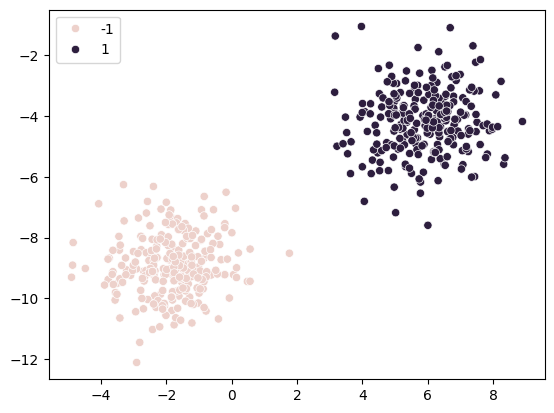

In [6]:
import seaborn as sns
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=40,train_size =0.80)
model = ScratchSVMClassifier(num_iter=100,lr=0.01,verbose=False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1.  1.
  1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1.
 -1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1.
 -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
 -1. -1.  1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.
  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.]


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate(y_pred, y_test):
  print("accuracy: {}".format(accuracy_score(y_test,y_pred)))
  print("precision: {}".format(precision_score(y_test,y_pred)))
  print("recall: {}".format(recall_score(y_test,y_pred)))
  print("f1: {}".format(f1_score(y_test,y_pred)))
evaluate(y_pred,y_test)

accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0


In [9]:
from sklearn.svm import SVC
model_sk = SVC()
model_sk.fit(X_train,y_train)
y_pred_sk = model_sk.predict(X_test)
evaluate(y_pred_sk,y_test)

accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0


## Problem 5

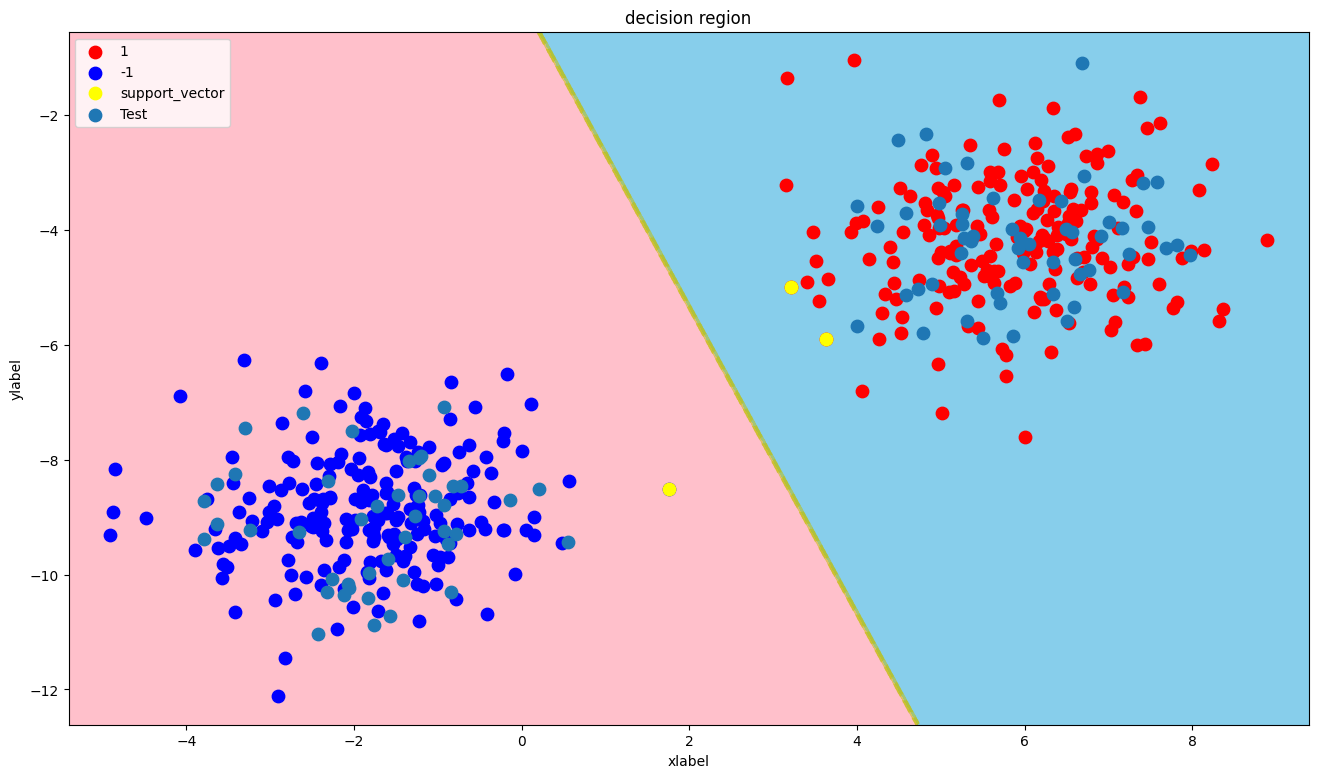

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['1', '-1']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.X_sv[:,0], model.X_sv[:,1], color='yellow', s=80, label='support_vector')
    plt.legend(handles=patches)
    plt.legend()
fig, ax = plt.subplots(figsize=(16,9))
decision_region(X_train,y_train,model)
plt.scatter(X_test[:,0], X_test[:,1], s=80, label="Test")
plt.legend();

# Problem 6 (Advanced Task)

In [11]:
model = ScratchSVMClassifier(num_iter=100,lr=0.01,verbose=False,kernel="polly",d=2)
model.fit(X_train,y_train)
y_pred_polly = model.predict(X_test)
evaluate(y_pred=y_pred_polly,y_test=y_test)

accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0


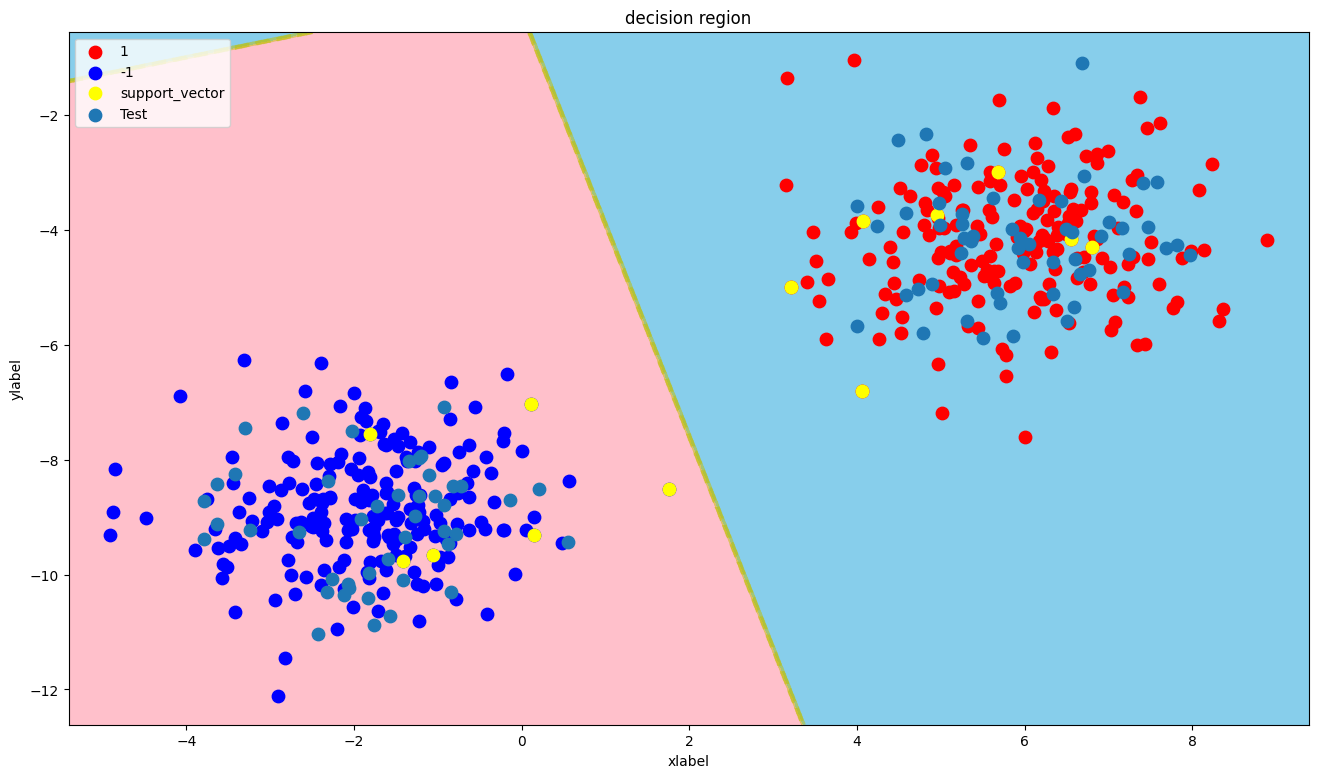

In [12]:
fig, ax = plt.subplots(figsize=(16,9))
decision_region(X_train,y_train,model)
plt.scatter(X_test[:,0], X_test[:,1], s=80, label="Test")
plt.legend();